In [ ]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100, random_weights=True):
        self.lr = learning_rate
        self.epochs = epochs
        if random_weights:
            self.weights = np.random.rand(input_size + 1)  # +1 for bias
        else:
            self.weights = np.zeros(input_size + 1)

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # weights[0] is the bias
        return self.activation_function(summation)

    def train(self, X, y):
        for epoch in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                # Update weights and bias
                self.weights[1:] += self.lr * error * inputs
                self.weights[0] += self.lr * error

            print(f'Epoch {epoch + 1}/{self.epochs}, Weights: {self.weights}')

In [ ]:
# Function to test the perceptron
def test_perceptron(perceptron, X, y):
    print("Testing the Perceptron:")
    for inputs, label in zip(X, y):
        prediction = perceptron.predict(inputs)
        print(f"Inputs: {inputs}, Target: {label}, Prediction: {prediction}")

### **1. AND Gate Classification**

In [ ]:
# AND gate truth table
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

In [ ]:
# AND Gate
print("Training Perceptron for AND Gate")
and_perceptron = Perceptron(input_size=2, epochs=10)
and_perceptron.train(X_and, y_and)

# Testing the model
print("\nTesting AND Gate Perceptron")
for inputs in X_and:
    print(f"Input: {inputs}, Output: {and_perceptron.predict(inputs)}")

Training Perceptron for AND Gate
Epoch 1/10, Weights: [0.55351119 0.60474495 0.01529866]
Epoch 2/10, Weights: [ 0.25351119  0.50474495 -0.08470134]
Epoch 3/10, Weights: [-0.04648881  0.40474495 -0.18470134]
Epoch 4/10, Weights: [-0.04648881  0.40474495 -0.08470134]
Epoch 5/10, Weights: [-0.14648881  0.30474495 -0.08470134]
Epoch 6/10, Weights: [-0.14648881  0.30474495  0.01529866]
Epoch 7/10, Weights: [-0.14648881  0.30474495  0.11529866]
Epoch 8/10, Weights: [-0.24648881  0.20474495  0.11529866]
Epoch 9/10, Weights: [-0.24648881  0.20474495  0.11529866]
Epoch 10/10, Weights: [-0.24648881  0.20474495  0.11529866]

Testing AND Gate Perceptron
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


In [ ]:
# Training and testing with random weights
print("Training with random weights:")
perceptron_random = Perceptron(input_size=2, random_weights=True)
perceptron_random.train(X_and, y_and)
test_perceptron(perceptron_random, X_and, y_and)

# Training and testing with defined (zero) weights
print("\nTraining with defined (zero) weights:")
perceptron_defined = Perceptron(input_size=2, random_weights=False)
perceptron_defined.train(X_and, y_and)
test_perceptron(perceptron_defined, X_and, y_and)

Training with random weights:
Epoch 1/100, Weights: [0.36971619 0.42409112 0.52142113]
Epoch 2/100, Weights: [0.06971619 0.32409112 0.42142113]
Epoch 3/100, Weights: [-0.23028381  0.22409112  0.32142113]
Epoch 4/100, Weights: [-0.33028381  0.22409112  0.22142113]
Epoch 5/100, Weights: [-0.33028381  0.22409112  0.22142113]
Epoch 6/100, Weights: [-0.33028381  0.22409112  0.22142113]
Epoch 7/100, Weights: [-0.33028381  0.22409112  0.22142113]
Epoch 8/100, Weights: [-0.33028381  0.22409112  0.22142113]
Epoch 9/100, Weights: [-0.33028381  0.22409112  0.22142113]
Epoch 10/100, Weights: [-0.33028381  0.22409112  0.22142113]
Epoch 11/100, Weights: [-0.33028381  0.22409112  0.22142113]
Epoch 12/100, Weights: [-0.33028381  0.22409112  0.22142113]
Epoch 13/100, Weights: [-0.33028381  0.22409112  0.22142113]
Epoch 14/100, Weights: [-0.33028381  0.22409112  0.22142113]
Epoch 15/100, Weights: [-0.33028381  0.22409112  0.22142113]
Epoch 16/100, Weights: [-0.33028381  0.22409112  0.22142113]
Epoch 17/

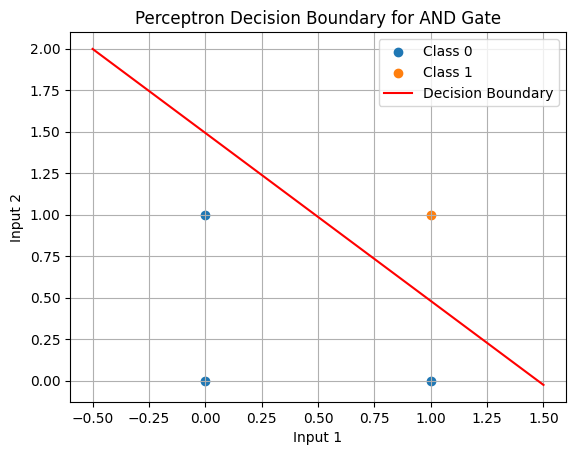

In [ ]:
# Visualizing decision boundary
def plot_decision_boundary(perceptron, X, y):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')

    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(perceptron.weights[0] + perceptron.weights[1] * x1) / perceptron.weights[2]

    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('Perceptron Decision Boundary for AND Gate')
    plt.grid(True)
    plt.show()

plot_decision_boundary(perceptron_random, X_and, y_and)

***Questions:***


**How do the weights and bias values change during training for the AND gate?**

**Ans:** The weights and bias values change based on the error between the predicted output and the actual label during each epoch. In this case, weights will increase if the output does not match the actual AND gate output.



**Can the perceptron successfully learn the AND logic with a linear decision boundary?**

**Ans:** Yes, the perceptron will successfully learn the AND logic since the problem is linearly separable, with a linear decision boundary that classifies the two classes.

### **2. OR Gate Classification**

In [ ]:
# OR gate truth table
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

In [ ]:
# OR Gate
print("Training Perceptron for OR Gate")
or_perceptron = Perceptron(input_size=2, epochs=10)
or_perceptron.train(X_or, y_or)

# Testing the model
print("\nTesting OR Gate Perceptron")
for inputs in X_or:
    print(f"Input: {inputs}, Output: {or_perceptron.predict(inputs)}")

Training Perceptron for OR Gate
Epoch 1/10, Weights: [0.48508899 0.32193638 0.47275684]
Epoch 2/10, Weights: [0.38508899 0.32193638 0.47275684]
Epoch 3/10, Weights: [0.28508899 0.32193638 0.47275684]
Epoch 4/10, Weights: [0.18508899 0.32193638 0.47275684]
Epoch 5/10, Weights: [0.08508899 0.32193638 0.47275684]
Epoch 6/10, Weights: [-0.01491101  0.32193638  0.47275684]
Epoch 7/10, Weights: [-0.01491101  0.32193638  0.47275684]
Epoch 8/10, Weights: [-0.01491101  0.32193638  0.47275684]
Epoch 9/10, Weights: [-0.01491101  0.32193638  0.47275684]
Epoch 10/10, Weights: [-0.01491101  0.32193638  0.47275684]

Testing OR Gate Perceptron
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


In [ ]:
# Training and testing with random weights
print("Training with random weights:")
perceptron_random = Perceptron(input_size=2, random_weights=True)
perceptron_random.train(X_or, y_or)
test_perceptron(perceptron_random, X_or, y_or)

# Training and testing with defined (zero) weights
print("\nTraining with defined (zero) weights:")
perceptron_defined = Perceptron(input_size=2, random_weights=False)
perceptron_defined.train(X_or, y_or)
test_perceptron(perceptron_defined, X_or, y_or)

Training with random weights:
Epoch 1/100, Weights: [0.79270357 0.12802813 0.13208729]
Epoch 2/100, Weights: [0.69270357 0.12802813 0.13208729]
Epoch 3/100, Weights: [0.59270357 0.12802813 0.13208729]
Epoch 4/100, Weights: [0.49270357 0.12802813 0.13208729]
Epoch 5/100, Weights: [0.39270357 0.12802813 0.13208729]
Epoch 6/100, Weights: [0.29270357 0.12802813 0.13208729]
Epoch 7/100, Weights: [0.19270357 0.12802813 0.13208729]
Epoch 8/100, Weights: [0.09270357 0.12802813 0.13208729]
Epoch 9/100, Weights: [-0.00729643  0.12802813  0.13208729]
Epoch 10/100, Weights: [-0.00729643  0.12802813  0.13208729]
Epoch 11/100, Weights: [-0.00729643  0.12802813  0.13208729]
Epoch 12/100, Weights: [-0.00729643  0.12802813  0.13208729]
Epoch 13/100, Weights: [-0.00729643  0.12802813  0.13208729]
Epoch 14/100, Weights: [-0.00729643  0.12802813  0.13208729]
Epoch 15/100, Weights: [-0.00729643  0.12802813  0.13208729]
Epoch 16/100, Weights: [-0.00729643  0.12802813  0.13208729]
Epoch 17/100, Weights: [-0.

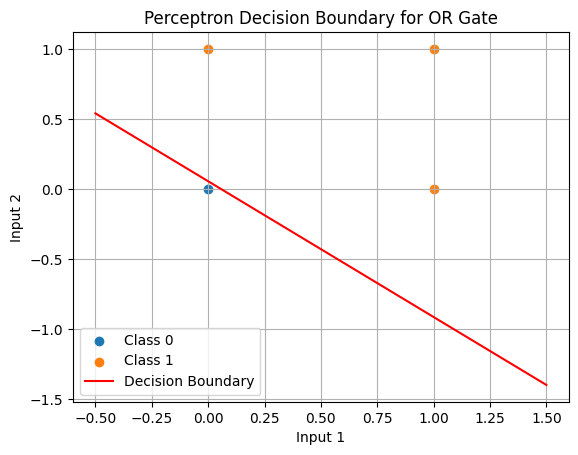

In [ ]:
# Visualizing decision boundary
def plot_decision_boundary(perceptron, X, y):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')

    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(perceptron.weights[0] + perceptron.weights[1] * x1) / perceptron.weights[2]

    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('Perceptron Decision Boundary for OR Gate')
    plt.grid(True)
    plt.show()

plot_decision_boundary(perceptron_random, X_or, y_or)

***Questions:***


**What changes in the perceptron's weights are necessary to represent the OR gate logic?**

**Ans:** It is similar to the AND gate; the weights adjust based on the error, and it typically learns the OR gate's behaviour.



**How does the linear decision boundary look for the OR gate classification?**

**Ans:** The OR gate is linearly separable, and a single-layer perceptron can successfully classify the output with a straight decision boundary.

### **3. AND-NOT Gate Classification**

In [ ]:
# AND-NOT gate truth table (A AND NOT B)
X_and_not = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_not = np.array([0, 0, 1, 0])

In [ ]:
# AND-NOT Gate
print("Training Perceptron for AND-NOT Gate")
and_not_perceptron = Perceptron(input_size=2, epochs=10)
and_not_perceptron.train(X_and_not, y_and_not)

# Test the model
print("\nTesting AND-NOT Gate Perceptron")
for inputs in X_and_not:
    print(f"Input: {inputs}, Output: {and_not_perceptron.predict(inputs)}")

Training Perceptron for AND-NOT Gate
Epoch 1/10, Weights: [ 0.23067609 -0.00809972 -0.05409105]
Epoch 2/10, Weights: [ 0.03067609 -0.00809972 -0.15409105]
Epoch 3/10, Weights: [ 0.03067609  0.09190028 -0.15409105]
Epoch 4/10, Weights: [-0.06932391  0.09190028 -0.15409105]
Epoch 5/10, Weights: [-0.06932391  0.09190028 -0.15409105]
Epoch 6/10, Weights: [-0.06932391  0.09190028 -0.15409105]
Epoch 7/10, Weights: [-0.06932391  0.09190028 -0.15409105]
Epoch 8/10, Weights: [-0.06932391  0.09190028 -0.15409105]
Epoch 9/10, Weights: [-0.06932391  0.09190028 -0.15409105]
Epoch 10/10, Weights: [-0.06932391  0.09190028 -0.15409105]

Testing AND-NOT Gate Perceptron
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 1
Input: [1 1], Output: 0


In [ ]:
# Training and testing with random weights
print("Training with random weights:")
perceptron_random = Perceptron(input_size=2, random_weights=True)
perceptron_random.train(X_and_not, y_and_not)
test_perceptron(perceptron_random, X_and_not, y_and_not)

# Training and testing with defined (zero) weights
print("\nTraining with defined (zero) weights:")
perceptron_defined = Perceptron(input_size=2, random_weights=False)
perceptron_defined.train(X_and_not, y_and_not)
test_perceptron(perceptron_defined, X_and_not, y_and_not)

Training with random weights:
Epoch 1/100, Weights: [-0.29799414  0.24867381  0.79137191]
Epoch 2/100, Weights: [-0.39799414  0.24867381  0.59137191]
Epoch 3/100, Weights: [-0.49799414  0.24867381  0.39137191]
Epoch 4/100, Weights: [-0.49799414  0.24867381  0.29137191]
Epoch 5/100, Weights: [-0.49799414  0.24867381  0.19137191]
Epoch 6/100, Weights: [-0.49799414  0.24867381  0.09137191]
Epoch 7/100, Weights: [-0.49799414  0.24867381 -0.00862809]
Epoch 8/100, Weights: [-0.39799414  0.34867381 -0.00862809]
Epoch 9/100, Weights: [-0.39799414  0.34867381 -0.10862809]
Epoch 10/100, Weights: [-0.39799414  0.34867381 -0.20862809]
Epoch 11/100, Weights: [-0.29799414  0.44867381 -0.20862809]
Epoch 12/100, Weights: [-0.29799414  0.44867381 -0.20862809]
Epoch 13/100, Weights: [-0.29799414  0.44867381 -0.20862809]
Epoch 14/100, Weights: [-0.29799414  0.44867381 -0.20862809]
Epoch 15/100, Weights: [-0.29799414  0.44867381 -0.20862809]
Epoch 16/100, Weights: [-0.29799414  0.44867381 -0.20862809]
Epo

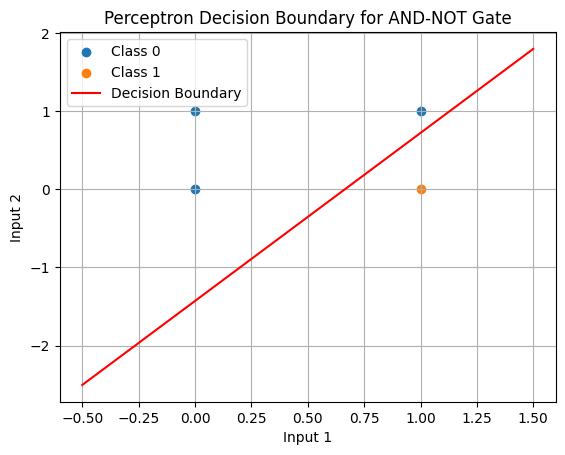

In [ ]:
# Visualizing decision boundary
def plot_decision_boundary(perceptron, X, y):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')

    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(perceptron.weights[0] + perceptron.weights[1] * x1) / perceptron.weights[2]

    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('Perceptron Decision Boundary for AND-NOT Gate')
    plt.grid(True)
    plt.show()

plot_decision_boundary(perceptron_random, X_and_not, y_and_not)

***Questions:***


**What is the perceptron's weight configuration after training for the AND-NOT gate?**

**Ans:** The perceptron learns to output 1 when the first input is 1 and the second input is 0. The weight configuration will reflect this as one weight gets updated positively while the other becomes neutralized.


**How does the perceptron handle cases where both inputs are 1 or 0?**

**Ans:** The perceptron correctly outputs 0 when both inputs are 1 or both are 0 since this is not a valid output for AND-NOT.

### **4. XOR Gate Classification**

In [ ]:
# XOR gate truth table (for completeness)
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

In [ ]:
# XOR Gate
print("Training Perceptron for XOR Gate")
xor_perceptron = Perceptron(input_size=2, epochs=10)
xor_perceptron.train(X_xor, y_xor)

# Test the model
print("\nTesting XOR Gate Perceptron")
for inputs in X_xor:
    print(f"Input: {inputs}, Output: {xor_perceptron.predict(inputs)}")

Training Perceptron for XOR Gate
Epoch 1/10, Weights: [-0.03714614  0.32038693  0.07515359]
Epoch 2/10, Weights: [-0.13714614  0.22038693 -0.02484641]
Epoch 3/10, Weights: [-0.13714614  0.12038693 -0.02484641]
Epoch 4/10, Weights: [-0.13714614  0.02038693 -0.02484641]
Epoch 5/10, Weights: [-0.03714614  0.02038693 -0.02484641]
Epoch 6/10, Weights: [-0.03714614 -0.07961307 -0.02484641]
Epoch 7/10, Weights: [ 0.06285386 -0.07961307 -0.02484641]
Epoch 8/10, Weights: [ 0.06285386 -0.07961307 -0.02484641]
Epoch 9/10, Weights: [ 0.06285386 -0.07961307 -0.02484641]
Epoch 10/10, Weights: [ 0.06285386 -0.07961307 -0.02484641]

Testing XOR Gate Perceptron
Input: [0 0], Output: 1
Input: [0 1], Output: 1
Input: [1 0], Output: 0
Input: [1 1], Output: 0


In [ ]:
# Training and testing with random weights
print("Training with random weights:")
perceptron_random = Perceptron(input_size=2, random_weights=True)
perceptron_random.train(X_xor, y_xor)
test_perceptron(perceptron_random, X_xor, y_xor)

# Training and testing with defined (zero) weights
print("\nTraining with defined (zero) weights:")
perceptron_defined = Perceptron(input_size=2, random_weights=False)
perceptron_defined.train(X_xor, y_xor)
test_perceptron(perceptron_defined, X_xor, y_xor)

Training with random weights:
Epoch 1/100, Weights: [0.66600308 0.59091964 0.87387751]
Epoch 2/100, Weights: [0.46600308 0.49091964 0.77387751]
Epoch 3/100, Weights: [0.26600308 0.39091964 0.67387751]
Epoch 4/100, Weights: [0.06600308 0.29091964 0.57387751]
Epoch 5/100, Weights: [-0.13399692  0.19091964  0.47387751]
Epoch 6/100, Weights: [-0.23399692  0.09091964  0.37387751]
Epoch 7/100, Weights: [-0.23399692  0.09091964  0.27387751]
Epoch 8/100, Weights: [-0.23399692  0.09091964  0.17387751]
Epoch 9/100, Weights: [-0.13399692  0.09091964  0.17387751]
Epoch 10/100, Weights: [-0.13399692  0.09091964  0.07387751]
Epoch 11/100, Weights: [-0.13399692 -0.00908036  0.07387751]
Epoch 12/100, Weights: [-0.03399692 -0.00908036  0.07387751]
Epoch 13/100, Weights: [-0.03399692 -0.00908036 -0.02612249]
Epoch 14/100, Weights: [-0.03399692 -0.10908036 -0.02612249]
Epoch 15/100, Weights: [ 0.06600308 -0.10908036 -0.02612249]
Epoch 16/100, Weights: [ 0.06600308 -0.10908036 -0.02612249]
Epoch 17/100, W

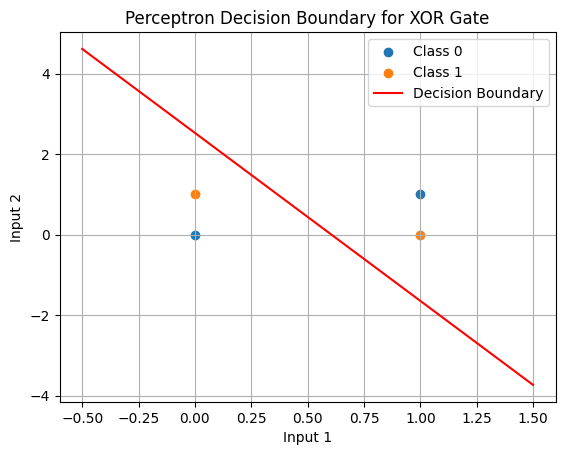

In [ ]:
# Visualizing decision boundary
def plot_decision_boundary(perceptron, X, y):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')

    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(perceptron.weights[0] + perceptron.weights[1] * x1) / perceptron.weights[2]

    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('Perceptron Decision Boundary for XOR Gate')
    plt.grid(True)
    plt.show()

plot_decision_boundary(perceptron_random, X_xor, y_xor)

***Questions:***


**Why does the Single Layer Perceptron struggle to classify the XOR gate?**

**Ans:** The XOR gate is not linearly separable, i.e., no single linear decision boundary can separate the outputs. A single-layer perceptron cannot handle this complexity. As a result, the Single Layer Perceptron fails to classify the XOR gate.



**What modifications can be made to the neural network model to handle the XOR gate correctly?**

**Ans:** A Yes, the perceptron will successfully learn the AND logic since the problem is linearly separable, with a linear decision boundary that classifies the two classes.
To correctly classify the XOR gate, we need a multi-layer perceptron (MLP), where an additional hidden layer enables non-linear separability through non-linear activation functions like ReLU or sigmoid.